### Import the necessary packages

In [1]:
from cralds_base.dataio import read_file, read_directory
from hermes_rheo.transforms.rheo_analysis import RheoAnalysis 
import matplotlib.pyplot as plt 

### Specify the filepath for your data

In [2]:
import os

# Get the current directory where the notebook is located
current_dir = os.path.dirname(os.path.abspath("__file__"))  # Use "__file__" to get the notebook's directory

# Construct the relative path
filepath_creep_dataset = os.path.join(current_dir, 'tutorial_data', 'tutorial_1', 'creep_experiment.txt')
filepath_multi_technique_dataset = os.path.join(current_dir, 'tutorial_data', 'tutorial_1', 'multi_technique.txt')

### Read the file using $piblin$

Here we use the package piblin to read the data and transform them into the piblin dataset format which will allows us to conviniently apply the rheological transforms of hermes.

In [3]:
creep_dataset = read_file(filepath=filepath_creep_dataset, create_composite_datasets=True)
print(creep_dataset)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 1

Varied Conditions
----------------

index	n_rep	method	Data Types	
0	1	Creep - 1	Temperature(°C)=f(Temperature[°C]) (483 points)	




#### Apply desired pipeline to the experiment

In [4]:
pipeline = RheoAnalysis()
processed_creep_dataset = pipeline(creep_dataset)
print(processed_creep_dataset)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 1

Varied Conditions
----------------

index	n_rep	method	Data Types	
0	1	Creep - 1	strain(%)=f(time[min]) (483 points)	




#### Visualize the processed data

ExperimentSet
-------------

Summary
-------
Number of Experiments: 1

Varied Conditions
----------------

index	n_rep	method	Data Types	
0	1	Creep - 1	strain(%)=f(time[min]) (483 points)	




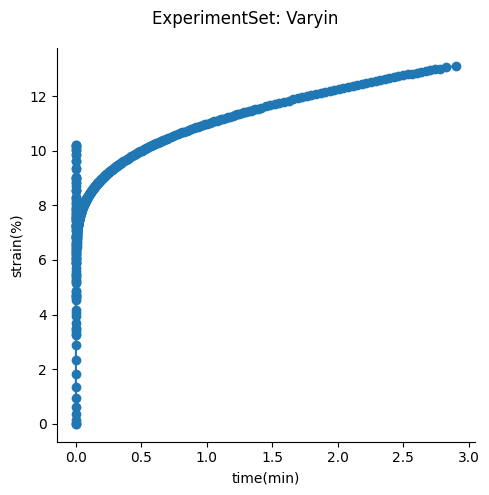

In [5]:
fig_creep, axs_creep = processed_creep_dataset.visualize(expand_replicates=True, marker='o')

In [6]:
multi_technique_dataset = read_file(filepath=filepath_multi_technique_dataset, create_composite_datasets=True)
pipeline = RheoAnalysis()
processed_multi_technique_dataset = pipeline(multi_technique_dataset)
print(processed_multi_technique_dataset)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 3

Varied Conditions
-----------------
method

index	n_rep	method	Data Types	
0	1	Amplitude sweep - 1	storage modulus(MPa)=f(oscillation strain (cmd)[%]) (29 points)	
1	1	Frequency sweep - 2	storage modulus(MPa)=f(angular frequency[rad/s]) (29 points)	
2	1	Flow ramp - 3	viscosity(Pa.s)=f(shear rate[1/s]) (223 points)	




#### Access specific experiment in the dataset

In [7]:
# index, n_rep, dataset number
amplitude_sweep_experiment = processed_multi_technique_dataset[0][0].datasets[0]
print(amplitude_sweep_experiment)

OneDimensionalCompositeDataset
------------------------------
Dataset Source: D:\codes\hermes\tutorial_notebooks\tutorial_data\tutorial_1\multi_technique.txt

Dependent Variable Data Properties: ndim=1, size=29 (29 bytes), shape=(29,)
Dependent Variable Labels: storage modulus(MPa)

Independent Variable Data Properties: n=1, lengths=[29]
Independent Variable Labels: oscillation strain (cmd)(%)

Values of storage modulus (MPa) as a function of oscillation strain (cmd) (%)

oscillation strain (cmd) = [  +0.0099   +0.0139 ...  +84.4592 +117.5245]
storage modulus          = [+0.0184 +0.0185 ... +0.0011 +0.0006]


#### Visualize specific set of data

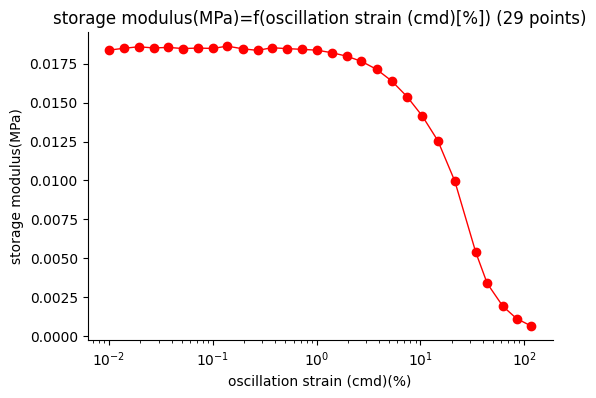

In [8]:
fig_sweep, ax_sweep = amplitude_sweep_experiment.visualize(marker='o',linewidth='1', color='red')  
fig_sweep.set_size_inches(6, 4)
ax_sweep.set_xscale('log')
# ax_sweep.set_yscale('log')

#### Access different coordinate in the experiment

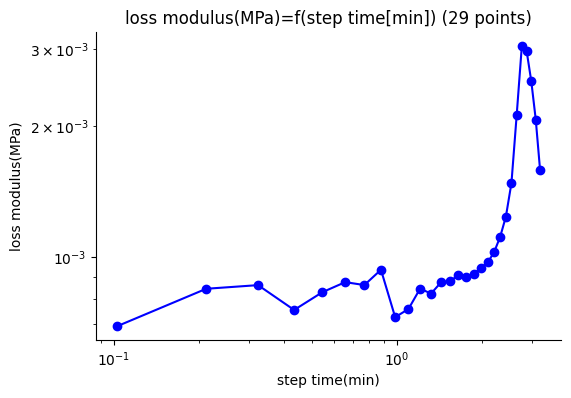

In [9]:
amplitude_sweep_experiment.switch_coordinates(independent_name='step time', dependent_name='loss modulus')
fig3, ax3 = amplitude_sweep_experiment.visualize(marker='o', color='blue')  
fig3.set_size_inches(6, 4)
ax3.set_xscale('log')
ax3.set_yscale('log')

#### Access the independent and dependent variables of the dataset

In [10]:
loss_modulus = amplitude_sweep_experiment.x_values
step_time = amplitude_sweep_experiment.y_values

print('loss modulus = ',loss_modulus)
print('step time = ',step_time)

loss modulus =  [+0.1029 +0.2119 ... +3.0939 +3.2046]
step time =  [+0.0007 +0.0008 ... +0.0021 +0.0016]


#### Access different experiment in the dataset

In [11]:
frequency_sweep_experiment = processed_multi_technique_dataset[1][0].datasets[0]
flow_ramp_experiment = processed_multi_technique_dataset[2][0].datasets[0]
print(frequency_sweep_experiment)
print(" ")
print(" ")
print(flow_ramp_experiment)

OneDimensionalCompositeDataset
------------------------------
Dataset Source: D:\codes\hermes\tutorial_notebooks\tutorial_data\tutorial_1\multi_technique.txt

Dependent Variable Data Properties: ndim=1, size=29 (29 bytes), shape=(29,)
Dependent Variable Labels: storage modulus(MPa)

Independent Variable Data Properties: n=1, lengths=[29]
Independent Variable Labels: angular frequency(rad/s)

Values of storage modulus (MPa) as a function of angular frequency (rad/s)

angular frequency = [+628.3185 +452.1964 ...   +0.0873   +0.0628]
storage modulus   = [+0.0180 +0.0166 ... +0.0150 +0.0149]
 
 
OneDimensionalCompositeDataset
------------------------------
Dataset Source: D:\codes\hermes\tutorial_notebooks\tutorial_data\tutorial_1\multi_technique.txt

Dependent Variable Data Properties: ndim=1, size=223 (223 bytes), shape=(223,)
Dependent Variable Labels: viscosity(Pa.s)

Independent Variable Data Properties: n=1, lengths=[223]
Independent Variable Labels: shear rate(1/s)

Values of viscos

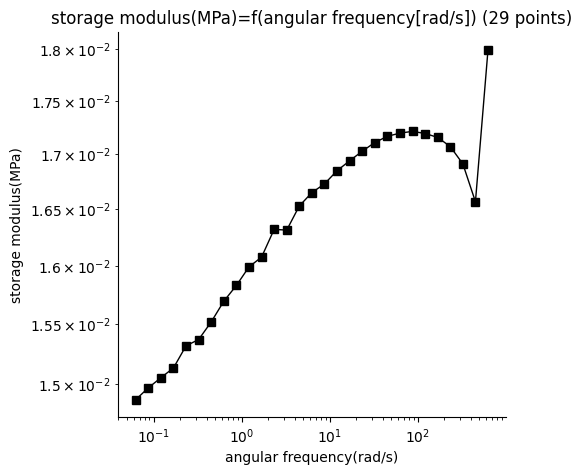

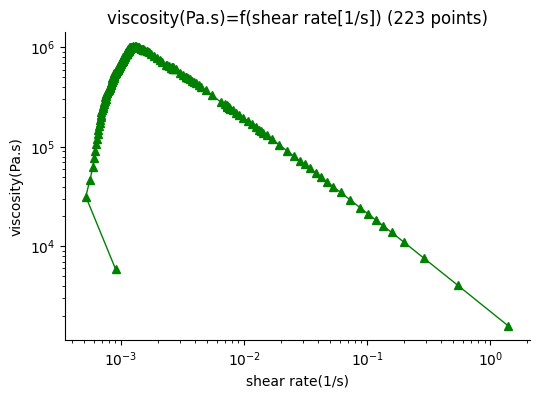

In [12]:
# Visualize frequency sweep experiment 
fig_freq, ax_freq = frequency_sweep_experiment.visualize(marker='s',linewidth='1', color='black')  
fig_sweep.set_size_inches(6, 4)
ax_freq.set_xscale('log')
ax_freq.set_yscale('log')

# Visualize flow ramp experiment 
fig_flow, ax_flow= flow_ramp_experiment.visualize(marker='^',linewidth='1', color='green')
fig_flow.set_size_inches(6, 4)
ax_flow.set_yscale('log')
ax_flow.set_xscale('log')

#### Reading multiple files in the same directory

In [13]:
directory_filepath = os.path.join(current_dir, 'tutorial_data', 'tutorial_1',)

experiments = read_directory(directory_filepath, merge_redundant=False)
experiments.detail_to_condition("source_file_name_head");
experiments.split_by_condition_name("source_file_name_head");

In [14]:
print(experiments)

ExperimentSet
-------------

Summary
-------
Number of Experiments: 4

Varied Conditions
-----------------
source_file_name_head, method

index	n_rep	source_file_name_head	method	Data Types	
0	1	creep_experiment	Creep - 1	Temperature(°C)=f(Temperature[°C]) (483 points)	
1	1	multi_technique	Amplitude sweep - 1	Temperature(°C)=f(Temperature[°C]) (29 points)	
2	1	multi_technique	Frequency sweep - 2	Temperature(°C)=f(Temperature[°C]) (29 points)	
3	1	multi_technique	Flow ramp - 3	Temperature(°C)=f(Temperature[°C]) (223 points)	


